In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from sklearn.datasets import load_diabetes as db
from sklearn import linear_model as lm

In [3]:
%matplotlib inline

In [4]:
x = np.array(range(11111))
x

array([    0,     1,     2, ..., 11108, 11109, 11110])

In [5]:
db

<function sklearn.datasets.base.load_diabetes>

In [6]:
db('data')

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [7]:
diabetes = db()

In [8]:
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [9]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

In [12]:
diabetes_X

array([[[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613]],

       [[-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405]],

       [[ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034]],

       ...,

       [[ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073]],

       [[-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034]],

       [[-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]])

In [13]:
diabetes_X_temp

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [14]:
diabetes.data.shape, diabetes_X.shape, diabetes_X_temp.shape

((442, 10), (442, 1, 10), (442, 1))

In [15]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

In [16]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [17]:
# Create linear regression object
regr = lm.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The Intercept
print('Intercept: \n', regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Residual sum of squares: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

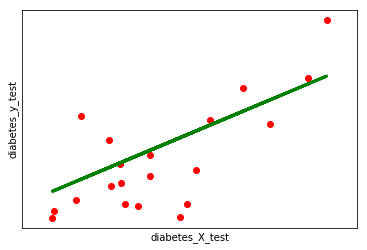

In [19]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='green',
         linewidth=3)

plt.xlabel('diabetes_X_test')
plt.ylabel('diabetes_y_test')
plt.xticks(())
plt.yticks(())

In [20]:
# Create 2nd linear regression object
regr2 = lm.LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)

### fit_intercept

If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered)

In [21]:
# Train the model using the training sets
regr2.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [22]:
# The coefficients
print('Coefficients: \n', regr2.coef_)
# The Intercept
print('Intercept: \n', regr2.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr2.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr2.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [970.16723129]
Intercept: 
 0.0
Residual sum of squares: 20687.81
Variance score: -3.28


([], <a list of 0 Text yticklabel objects>)

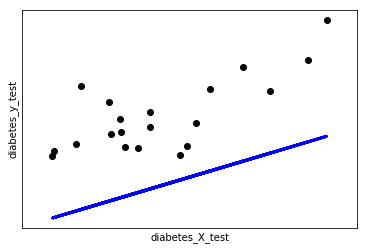

In [23]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr2.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xlabel('diabetes_X_test')
plt.ylabel('diabetes_y_test')
plt.xticks(())
plt.yticks(())

In [24]:
# Create 3rd linear regression object
regr3 = lm.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)

### normalize

default `False`

This parameter is ignored when `fit_intercept` is set to `False`. If `True`, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use `sklearn.preprocessing.StandardScaler` before calling fit on an estimator with `normalize=False`.

In [25]:
# Train the model using the training sets
regr3.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [26]:
# The coefficients
print('Coefficients: \n', regr3.coef_)
# The Intercept
print('Intercept: \n', regr3.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr3.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr3.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Residual sum of squares: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

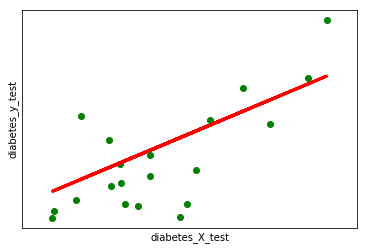

In [27]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='green')
plt.plot(diabetes_X_test, regr3.predict(diabetes_X_test), color='red',
         linewidth=3)

plt.xlabel('diabetes_X_test')
plt.ylabel('diabetes_y_test')
plt.xticks(())
plt.yticks(())

In [28]:
# Create 4th linear regression object
regr4 = lm.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=5)

In [29]:
# Train the model using the training sets
regr4.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=False)

In [30]:
# The coefficients
print('Coefficients: \n', regr4.coef_)
# The Intercept
print('Intercept: \n', regr4.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr4.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr4.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616167
Residual sum of squares: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

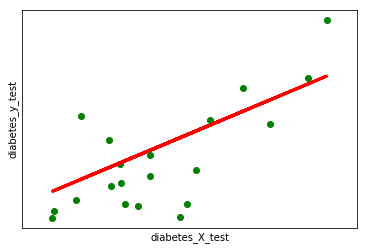

In [31]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='green')
plt.plot(diabetes_X_test, regr4.predict(diabetes_X_test), color='red',
         linewidth=3)
plt.xlabel('diabetes_X_test')
plt.ylabel('diabetes_y_test')
plt.xticks(())
plt.yticks(())

----------------


In [32]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 3]

In [33]:
diabetes_X

array([[[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613]],

       [[-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405]],

       [[ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034]],

       ...,

       [[ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073]],

       [[-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034]],

       [[-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]])

In [34]:
diabetes_X_temp

array([[ 2.18723550e-02],
       [-2.63278347e-02],
       [-5.67061055e-03],
       [-3.66564468e-02],
       [ 2.18723550e-02],
       [-1.94420933e-02],
       [-1.59992226e-02],
       [ 6.66296740e-02],
       [-4.00993175e-02],
       [-3.32135761e-02],
       [ 8.10087222e-03],
       [-3.32135761e-02],
       [-9.11348125e-03],
       [ 8.10087222e-03],
       [-1.25563519e-02],
       [ 8.04011568e-02],
       [ 4.94153205e-02],
       [ 5.63010619e-02],
       [-3.66564468e-02],
       [-4.00993175e-02],
       [-4.35421882e-02],
       [ 1.21513083e-03],
       [-9.11348125e-03],
       [ 3.10533436e-02],
       [-2.28849640e-02],
       [-4.00993175e-02],
       [-2.63278347e-02],
       [-4.00993175e-02],
       [-7.45280244e-02],
       [ 6.31868033e-02],
       [-1.94420933e-02],
       [-8.14137658e-02],
       [ 2.87580964e-02],
       [-2.22773986e-03],
       [-5.73136710e-02],
       [-4.92803060e-02],
       [ 5.28581912e-02],
       [-5.73136710e-02],
       [ 9.7

In [35]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

In [36]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [37]:
# Create linear regression object
regr = lm.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The Intercept
print('Intercept: \n', regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [709.19471785]
Intercept: 
 153.13724802041313
Residual sum of squares: 4058.41
Variance score: 0.16


([], <a list of 0 Text yticklabel objects>)

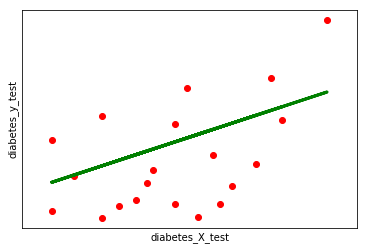

In [39]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='green',
         linewidth=3)

plt.xlabel('diabetes_X_test')
plt.ylabel('diabetes_y_test')
plt.xticks(())
plt.yticks(())